<img src="./media/itsoeh.png" width="300" align="center">

# Problemario



Nombre del alumno: **Rembrandt Alexander Calva Obregon**

Asignatura: **Matemáticas Aplicadas a las Comunicaciones**

Docente: **Saul Isai Soto Ortiz**

Temas:
- *Transformada de Derivadas*
- *Circuito RLC con Ecuaciones Diferenciales y Transformada de Laplace*

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import sympy as sp
from sympy import sin,cos,sec,csc
from sympy import Symbol, Function, Eq, exp
from scipy import integrate
import matplotlib.image as mpimg

# Seccion 1

<img src="./media/WhatsApp Image 2025-11-04 at 00.30.19.jpeg" width="300" align="center">

In [2]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')(t)

# Resolver la nueva ecuación: dy/dt + 4y = e^(-4t), y(0)=2
sol = sp.dsolve(
    sp.Eq(y.diff(t) + 4*y, sp.exp(-4*t)),
    ics={y.subs(t, 0): 2}
)

sp.init_printing(use_latex='mathjax')
print("Solución:")
display(sol)

Solución:


                -4⋅t
y(t) = (t + 2)⋅ℯ    

<img src="./media/WhatsApp Image 2025-11-04 at 00.30.20 (4).jpeg" width="300" align="center">

In [3]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')(t)

# Resolver directamente con condiciones iniciales
sol = sp.dsolve(
    sp.Eq(y.diff(t, t) + 5*y.diff(t) + 4*y, 0),
    ics={y.subs(t, 0): 1, y.diff(t).subs(t, 0): 0}
)

sp.init_printing(use_latex='mathjax')
display(sol)

       ⎛     -3⋅t⎞    
       ⎜4   ℯ    ⎟  -t
y(t) = ⎜─ - ─────⎟⋅ℯ  
       ⎝3     3  ⎠    

# Seccion 2

<img src="./media/WhatsApp Image 2025-11-04 at 00.30.20.jpeg" width="300" align="center">

<img src="./media/WhatsApp Image 2025-11-04 at 00.30.20 (1).jpeg" width="300" align="center">


# Análisis de un circuito RLC serie con Transformada de Laplace

- Resistencia: \(R = 10~\Omega\)
- Inductancia: \(L = 0.1~\text{H}\)
- Capacitancia: \(C = 100~\mu\text{F} = 100 \times 10^{-6}~\text{F}\)
- Entrada: escalón de \(5~\text{V}\) aplicado en \(t = 0\).

El objetivo es:

1. Obtener la **solución analítica** \(V_c(t)\) (tensión en el capacitor) mediante la **Transformada de Laplace**.
2. Graficar la **respuesta temporal** \(V_c(t)\) con simbología y anotaciones.
3. Graficar la **respuesta en frecuencia** \(|H(j\omega)|\) resaltando el comportamiento como filtro pasa–bajos.

## 1. Definición del circuito y función de transferencia

El circuito RLC serie tiene, en el dominio de Laplace, la siguiente relación entre \(V_c(s)\) y \(V_{in}(s)\):

\[
H(s) = \frac{V_c(s)}{V_{in}(s)} = \frac{1}{LC s^2 + RC s + 1}
\]

Donde:

- \(R = 10~\Omega\)
- \(L = 0.1~\text{H}\)
- \(C = 100~\mu\text{F} = 1/10000~\text{F}\)

In [5]:

# Definimos variables simbólicas
s, t = sp.symbols('s t', positive=True)

# Parámetros del circuito
R = 10
L = sp.Rational(1, 10)     # 0.1 H
C = sp.Rational(1, 10000)  # 100e-6 F

# Función de transferencia H(s) = Vc(s) / Vin(s)
H_s = 1 / (L*C*s**2 + R*C*s + 1)
H_s_simplified = sp.simplify(H_s)
H_s_simplified


      100000       
───────────────────
 2                 
s  + 100⋅s + 100000


## 2. Entrada escalón de 5 V y expresión de \(V_c(s)\)

Para una entrada escalón de amplitud \(5~\text{V}\), su Transformada de Laplace es:

\[
V_{in}(s) = \frac{5}{s}
\]

Por tanto:

\[
V_c(s) = H(s)\,V_{in}(s)
\]


In [6]:

# Entrada: escalón de 5 V => Laplace: 5/s
Vin_s = 5 / s

# Vc(s) = H(s) * Vin(s)
Vc_s = sp.simplify(H_s_simplified * Vin_s)
Vc_s


        500000         
───────────────────────
  ⎛ 2                 ⎞
s⋅⎝s  + 100⋅s + 100000⎠


## 3. Cálculo de la inversa de Laplace \(V_c(t)\)

Aplicamos la Transformada Inversa de Laplace para obtener la expresión en el tiempo:


In [7]:

# Inversa de Laplace para obtener Vc(t)
Vc_t = sp.inverse_laplace_transform(Vc_s, s, t)
Vc_t_simplified = sp.simplify(Vc_t)
Vc_t_simplified


  ⎛    50⋅t                                       ⎞  -50⋅t
5⋅⎝39⋅ℯ     - √39⋅sin(50⋅√39⋅t) - 39⋅cos(50⋅√39⋅t)⎠⋅ℯ     
──────────────────────────────────────────────────────────
                            39                            


## 4. Respuesta temporal \(V_c(t)\) con simbología y anotaciones


- Línea punteada en 5 V (estado estable).
- Línea punteada en el valor máximo (sobreimpulso).
- Anotación del porcentaje de sobreimpulso.
- Flecha indicando la "Subida suave con oscilación".
- Título con literal **(a)** como en los ejemplos de laboratorio.


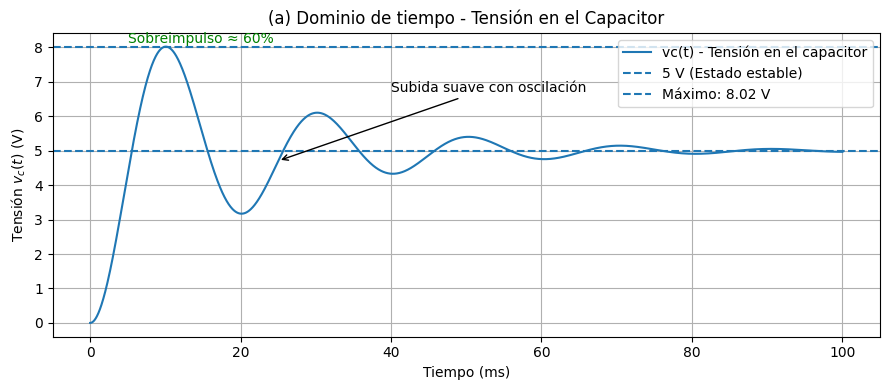

(5.0, 8.023389663274415, 60.467793265488304)

In [8]:

# Convertimos Vc(t) a función numérica
Vc_t_num = sp.lambdify(t, Vc_t_simplified, 'numpy')

# Rango de tiempo: 0 a 100 ms
t_values = np.linspace(0, 0.1, 2000)  # segundos
t_ms = t_values * 1000                # milisegundos

Vc_values = Vc_t_num(t_values)

# Cálculo de máximos y sobreimpulso
V_final = 5.0
V_max = np.max(Vc_values)
Mp = (V_max - V_final) / V_final * 100   # sobreimpulso en %

plt.figure(figsize=(9, 4))

# Curva principal
plt.plot(t_ms, Vc_values, label='vc(t) - Tensión en el capacitor')

# Línea de estado estable
plt.axhline(V_final, linestyle='--', label='5 V (Estado estable)')

# Línea de máximo
plt.axhline(V_max, linestyle='--', label=f'Máximo: {V_max:.2f} V')

# Texto de sobreimpulso
plt.text(t_ms[-1]*0.05, V_max + 0.1, f'Sobreimpulso ≈ {Mp:.0f}%', color='green')

# Anotación de "Subida suave con oscilación"
idx_mid = int(len(t_ms) * 0.25)
plt.annotate('Subida suave con oscilación',
             xy=(t_ms[idx_mid], Vc_values[idx_mid]),
             xytext=(t_ms[idx_mid] + 15, Vc_values[idx_mid] + 2),
             arrowprops=dict(arrowstyle='->'))

plt.title('(a) Dominio de tiempo - Tensión en el Capacitor')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Tensión $v_c(t)$ (V)')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

V_final, V_max, Mp



## 5. Parámetros de segundo orden \(\omega_n\), \(\zeta\) y frecuencia de resonancia

La función de transferencia puede escribirse en la forma estándar de un sistema de segundo orden:

\[
H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
\]

Calculamos:

- Frecuencia natural no amortiguada \(\omega_n\).
- Factor de amortiguamiento \(\zeta\).
- Frecuencia de resonancia \(f_r = \omega_n / (2\pi)\).


In [9]:

# Cálculo de parámetros de segundo orden
omega_n = sp.sqrt(1/(L*C))
zeta = R/2 * sp.sqrt(C/L)
f_r = omega_n / (2*sp.pi)

omega_n_val = float(omega_n.evalf())
zeta_val = float(zeta.evalf())
f_r_val = float(f_r.evalf())

omega_n, zeta, f_r, omega_n_val, zeta_val, f_r_val


⎛                   50⋅√10                                                     ↪
⎜100⋅√10, 0.05⋅√10, ──────, 316.2277660168379, 0.15811388300841897, 50.3292121 ↪
⎝                     π                                                        ↪

↪         ⎞
↪ 04487034⎟
↪         ⎠


## 6. Respuesta en frecuencia \(|H(j\omega)|\) con comportamiento de filtro pasa–bajos


\[
H(j\omega) = \frac{1}{1 - LC\omega^2 + j\,RC\omega}
\]

y graficamos \(|H(j\omega)|\) en dB desde 1 Hz hasta 100 kHz, añadiendo:

- Línea vertical en la frecuencia de corte / resonancia \(f_r\).
- Región **verde** donde las frecuencias pasan (banda útil).
- Región **roja** donde las frecuencias son atenuadas.
- Anotaciones: *Filtro Pasa-Bajos* y *Atenúa ruido de alta frecuencia*.


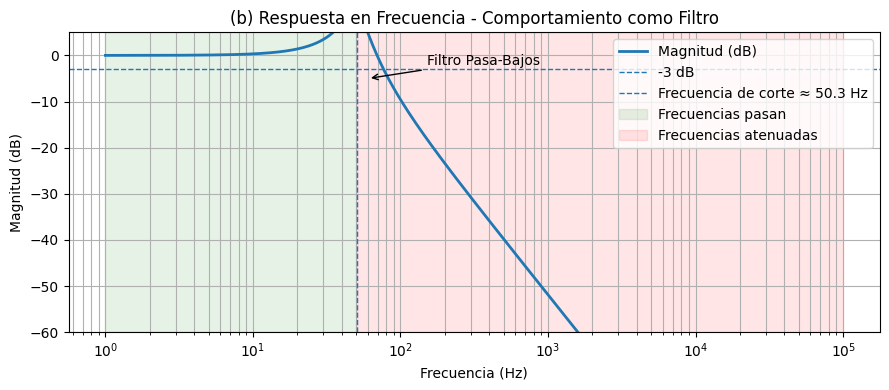

50.329212104487034

In [10]:

# Rango de frecuencia (logarítmico) de 1 Hz a 100 kHz
f_values = np.logspace(0, 5, 1000)  # 10^0 a 10^5 Hz
omega_values = 2 * np.pi * f_values

R_val = float(R)
L_val = float(L)
C_val = float(C)

# H(jw)
Hjw = 1 / (1 - L_val*C_val*omega_values**2 + 1j*R_val*C_val*omega_values)
H_mag = np.abs(Hjw)
H_db = 20 * np.log10(H_mag)

# Frecuencia de resonancia / corte aproximada
omega_n_val = float(sp.sqrt(1/(L*C)))
f_r_val = omega_n_val / (2*np.pi)

plt.figure(figsize=(9, 4))

# Curva principal de magnitud
plt.semilogx(f_values, H_db, label='Magnitud (dB)', linewidth=2)

# Línea -3 dB aproximada
plt.axhline(-3, linestyle='--', linewidth=1, label='-3 dB')

# Línea vertical en frecuencia de corte
plt.axvline(f_r_val, linestyle='--', linewidth=1, label=f'Frecuencia de corte ≈ {f_r_val:.1f} Hz')

# Rellenos de regiones: pasa (verde) y atenuada (roja)
y_min, y_max = -60, 5
plt.fill_between(f_values, y_min, y_max,
                 where=(f_values <= f_r_val),
                 alpha=0.1, color='green', label='Frecuencias pasan')
plt.fill_between(f_values, y_min, y_max,
                 where=(f_values > f_r_val),
                 alpha=0.1, color='red', label='Frecuencias atenuadas')

# Anotaciones de texto
plt.annotate('Filtro Pasa-Bajos',
             xy=(f_r_val*1.2, -5),
             xytext=(f_r_val*3, -2),
             arrowprops=dict(arrowstyle='->'))

plt.annotate('Atenúa ruidode alta frecuencia',
             xy=(1e4, H_db[f_values.searchsorted(1e4)]),
             xytext=(1e3, -40),
             arrowprops=dict(arrowstyle='->'))

plt.title('(b) Respuesta en Frecuencia - Comportamiento como Filtro')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.ylim(y_min, y_max)
plt.grid(True, which='both')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

f_r_val


<img src="./media/WhatsApp Image 2025-11-04 at 00.30.20 (2).jpeg" width="300" align="center">

<img src="./media/WhatsApp Image 2025-11-04 at 00.30.20 (3).jpeg" width="300" align="center">

In [4]:

print("\n ECUACIÓN DIFERENCIAL EN DOMINIO DEL TIEMPO")
print("-" * 50)
print("q''(t) + 20q'(t) + 200q(t) = 15·sin(10t)")
print("Condiciones iniciales: q(0) = 0, q'(0) = 0")


print("\n  EN DOMINIO S (TRANSFORMADA DE LAPLACE)")
print("-" * 50)
print("Q(s) = 150/[(s² + 100)(s² + 20s + 200)]")
print("Q(s) = (-3/50·s + 3/10)/(s² + 100) + (3/50·s + 9/10)/[(s + 10)² + 100]")


print("\n DOMINIO DEL TIEMPO")
print("-" * 50)

print("q(t) = 3/50·(e^(-10t) - 1)·cos(10t) + 3/100·(e^(-10t) + 1)·sin(10t)")



 ECUACIÓN DIFERENCIAL EN DOMINIO DEL TIEMPO
--------------------------------------------------
q''(t) + 20q'(t) + 200q(t) = 15·sin(10t)
Condiciones iniciales: q(0) = 0, q'(0) = 0

  EN DOMINIO S (TRANSFORMADA DE LAPLACE)
--------------------------------------------------
Q(s) = 150/[(s² + 100)(s² + 20s + 200)]
Q(s) = (-3/50·s + 3/10)/(s² + 100) + (3/50·s + 9/10)/[(s + 10)² + 100]

 DOMINIO DEL TIEMPO
--------------------------------------------------
q(t) = 3/50·(e^(-10t) - 1)·cos(10t) + 3/100·(e^(-10t) + 1)·sin(10t)
